# Diabetes Risk Analysis - EDA
This notebook performs exploratory data analysis (EDA) on a synthetic diabetes-related health dataset. We examine patterns and correlations among health indicators like BMI, glucose, cholesterol, and lifestyle factors.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/achyutskulkarni/Downloads/notebooks/diabetes_dataset.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


### Summary Statistics

In [7]:
df.describe()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Dietary_Intake_Calories,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.620400,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,2742.481900,0.507000,0.516500
std,14.343489,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,716.643803,0.499976,0.499753
min,20.000000,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,1500.000000,0.000000,0.000000
25%,32.000000,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,2129.000000,0.000000,0.000000
50%,45.000000,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,2727.000000,1.000000,1.000000
75%,57.000000,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,3368.000000,1.000000,1.000000
max,69.000000,40.000000,120.00000,200.000000,15.000000,179.000000,119.000000,300.000000,80.000000,200.00000,100.00000,8.000000,3999.000000,1.000000,1.000000


### Check Missing Values

In [9]:
df.isnull().sum()

Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

### Correlation Heatmap

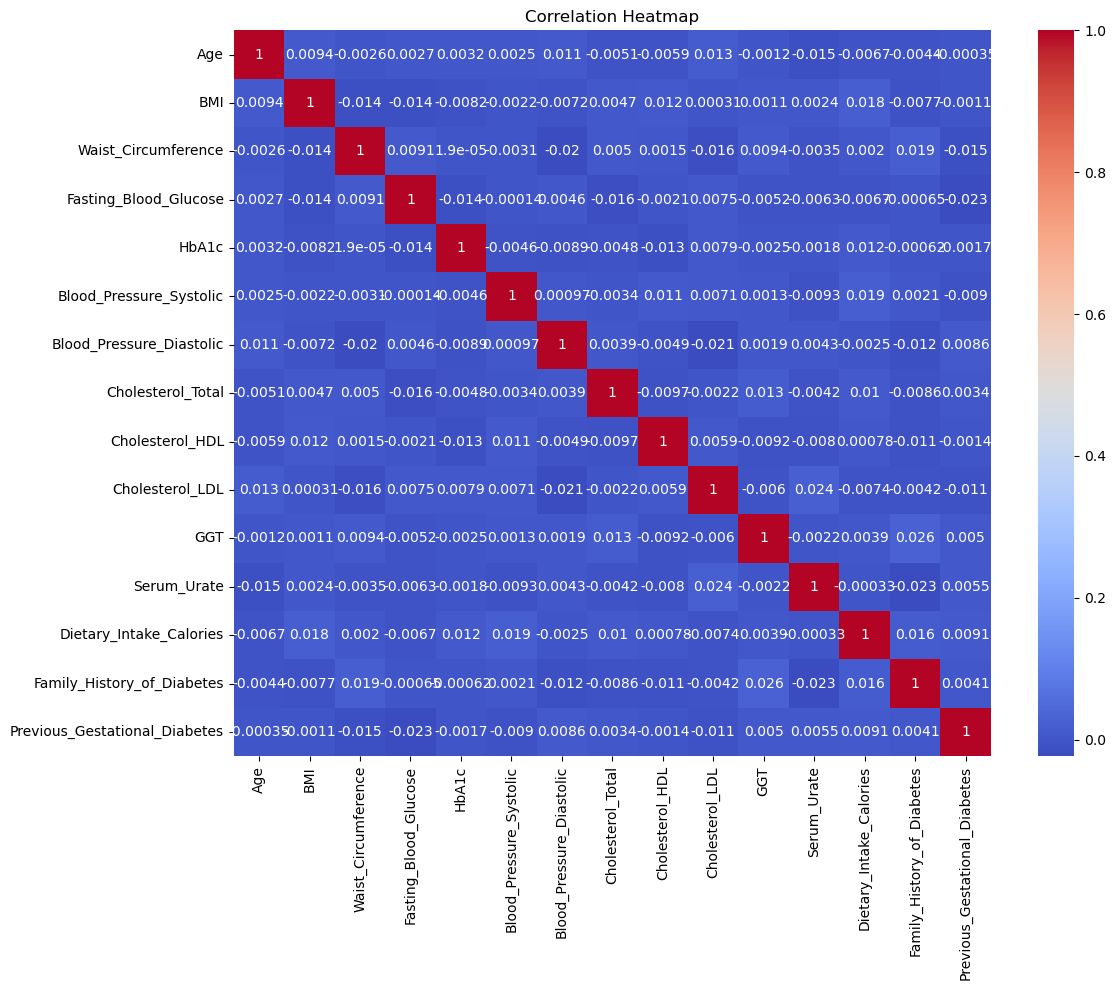

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### HbA1c Distribution

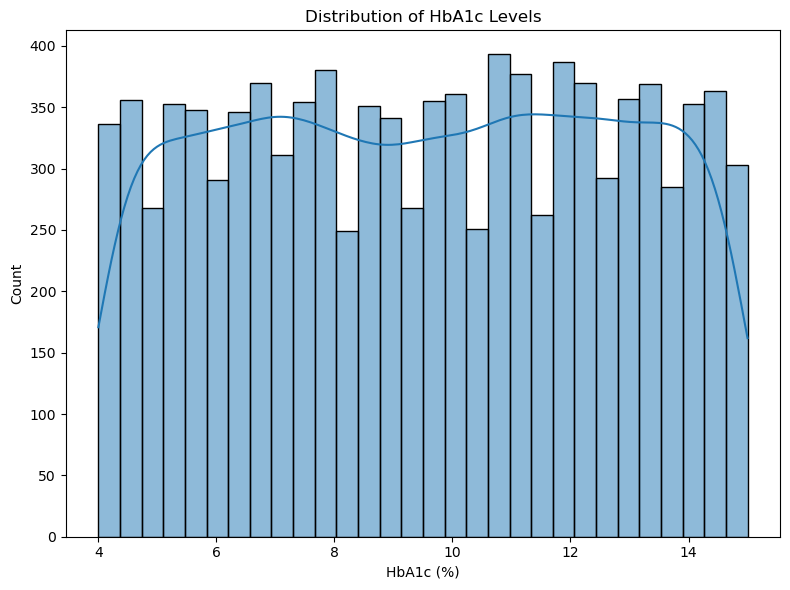

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['HbA1c'], bins=30, kde=True)
plt.title('Distribution of HbA1c Levels')
plt.xlabel('HbA1c (%)')
plt.tight_layout()
plt.show()

### Average HbA1c by Sex

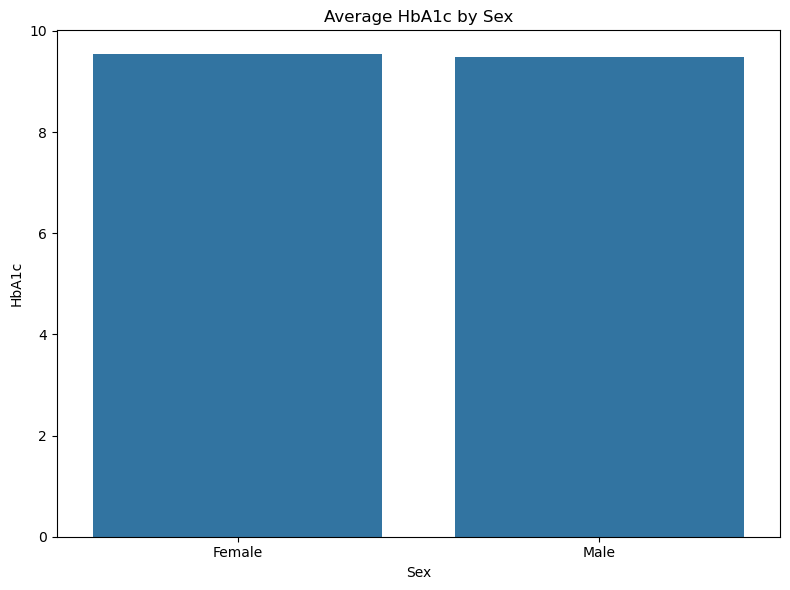

In [15]:
grouped = df.groupby('Sex')[['HbA1c']].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped, x='Sex', y='HbA1c')
plt.title('Average HbA1c by Sex')
plt.tight_layout()
plt.show()

### Risk Level Distribution

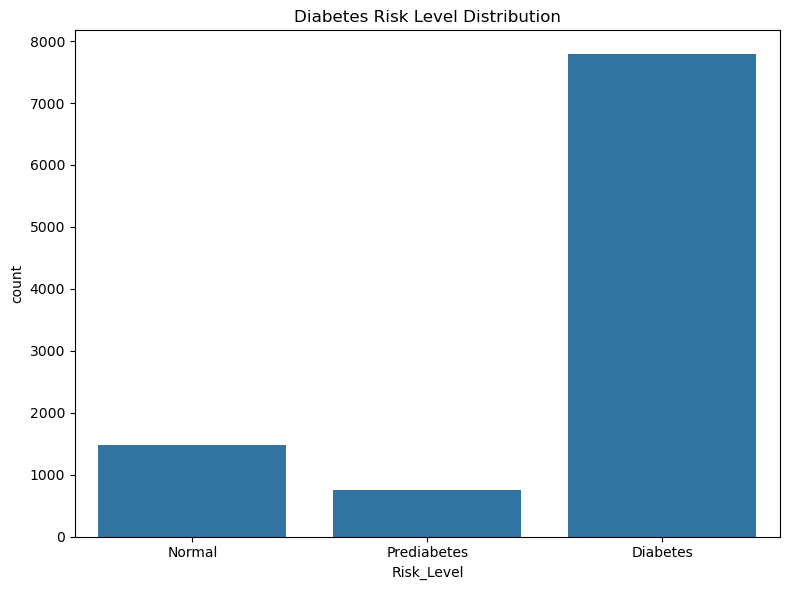

In [17]:
df['Risk_Level'] = pd.cut(df['HbA1c'],
                          bins=[0, 5.6, 6.4, 15],
                          labels=['Normal', 'Prediabetes', 'Diabetes'])
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Risk_Level', order=['Normal', 'Prediabetes', 'Diabetes'])
plt.title('Diabetes Risk Level Distribution')
plt.tight_layout()
plt.show()